# nd:YAG Laser

## initial imports

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString as ls
from scipy.optimize import curve_fit
from scipy.signal import find_peaks,peak_widths
import scipy.constants as con
import uncertainties as un
import csv
import math

In [38]:
# signifikanztest

def ttest(werte,unsicherheiten):
    for i,(v1, uv1) in enumerate(zip(werte,unsicherheiten)):
        # print(i,end = '\t')
        for j,(v2, uv2) in enumerate(zip(werte, unsicherheiten)):
            d = abs(v1-v2)
            ud = np.sqrt(uv1**2 + uv2**2)
            t = d/ud
            print(round(t,3), end = '\t')
        print()

def prob(x):
    return np.exp(-x**2/2)/np.sqrt(2*con.pi)


def ttestPaussen(werte,unsicherheiten):
    for i,(v1, uv1) in enumerate(zip(werte,unsicherheiten)):
        for j,(v2, uv2) in enumerate(zip(werte, unsicherheiten)):
            d = abs(v1-v2)
            ud = np.sqrt(uv1**2 + uv2**2)
            t = d/ud
            P = quad(prob,-t,t)
            # print(round((P[0])*100,3), end = '\t')
            print(f"\SI{{{round((P[0])*100,3)}}}" + r"{\percent}", end = '\t')
            # print(P, end = '\t')
        print()
def ttestPinnen(werte,unsicherheiten):
    for i,(v1, uv1) in enumerate(zip(werte,unsicherheiten)):
        for j,(v2, uv2) in enumerate(zip(werte, unsicherheiten)):
            d = abs(v1-v2)
            ud = np.sqrt(uv1**2 + uv2**2)
            t = d/ud
            P = quad(prob,-t,t)
            # print(round((1-P[0])*100,3), end = '\t')
            print(f"\SI{{{round((1-P[0])*100,3)}}}" + r"{\percent}", end = '\t')
            # print(P, end = '\t')
        print()
# normalize
def normalize(arr, t_min, t_max):
    arr = arr.to_numpy()
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr
def simple_norm(arr):
    arr = arr.to_numpy()
    norm_arr = []
    diff = 1
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr)
        norm_arr.append(temp)
    return norm_arr


## 6. spiking

In [39]:
spk25 = pd.read_csv("ndYAK-Laser/data/spiking/250mA.csv",skiprows=1)
spk3 = pd.read_csv("ndYAK-Laser/data/spiking/300mA.csv",skiprows=1)
spk25,spk3

(      Sequence  Volt  Volt.1  -4.450000e-03  5.000000e-06
 0            0 -2.76   -0.48            NaN           NaN
 1            1 -2.76   -0.48            NaN           NaN
 2            2 -2.76   -0.48            NaN           NaN
 3            3 -2.76   -0.48            NaN           NaN
 4            4 -2.76   -0.46            NaN           NaN
 ...        ...   ...     ...            ...           ...
 1195      1195 -2.70   -0.48            NaN           NaN
 1196      1196 -2.76   -0.48            NaN           NaN
 1197      1197 -2.76   -0.48            NaN           NaN
 1198      1198 -2.70   -0.46            NaN           NaN
 1199      1199 -2.70   -0.46            NaN           NaN
 
 [1200 rows x 5 columns],
       Sequence  Volt  Volt.1  -4.450000e-03  5.000000e-06
 0            0 -2.76   -0.70            NaN           NaN
 1            1 -2.76   -0.70            NaN           NaN
 2            2 -2.76   -0.68            NaN           NaN
 3            3 -2.76   -0.6

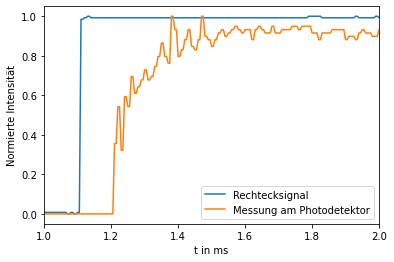

In [40]:
plt.plot(spk25['Sequence']*	5e-3,simple_norm(spk25['Volt']),label='Rechtecksignal')
plt.plot(spk25['Sequence']*	5e-3,simple_norm(spk25['Volt.1']),label='Messung am Photodetektor')
plt.xlim(1,2)
plt.xlabel('t in ms')
plt.ylabel('Normierte Intensität')
plt.legend()
plt.savefig("ndYAK-Laser/output/spk25.svg")

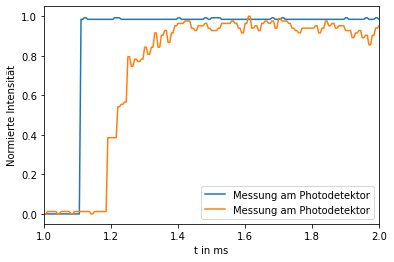

In [41]:
plt.plot(spk3['Sequence']*5e-3,simple_norm(spk3['Volt']),label='Messung am Photodetektor')
plt.plot(spk3['Sequence']*5e-3,simple_norm(spk3['Volt.1']),label='Messung am Photodetektor')
plt.xlim(1,2)
plt.xlabel('t in ms')
plt.ylabel('Normierte Intensität')
plt.legend()
plt.savefig("ndYAK-Laser/output/spk3.svg")

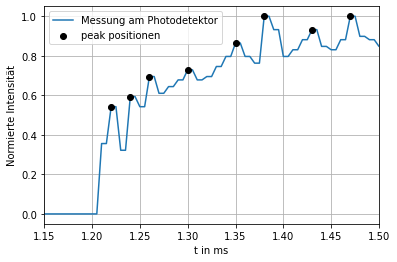

In [42]:
# plt.plot(spk25['Sequence']*	5e-3,simple_norm(spk25['Volt']),label='Rechtecksignal')
plt.plot(spk25['Sequence']*	5e-3,simple_norm(spk25['Volt.1']),label='Messung am Photodetektor')
peaks , _= find_peaks(simple_norm(spk25['Volt.1']))
peak_pos = spk25['Sequence'][peaks]
height = simple_norm(spk25['Volt.1'])
height =np.array(height)[peaks.astype(int)]
plt.scatter(peak_pos*5e-3 , height,c="k", zorder=5,label="peak positionen")
plt.xlim(1.15,1.5)
plt.xlabel('t in ms')
plt.ylabel('Normierte Intensität')
plt.grid()
plt.legend()
plt.savefig("ndYAK-Laser/output/spk25-peaks.svg")

array([1.22, 1.24, 1.26, 1.3 , 1.35, 1.38, 1.43, 1.47])

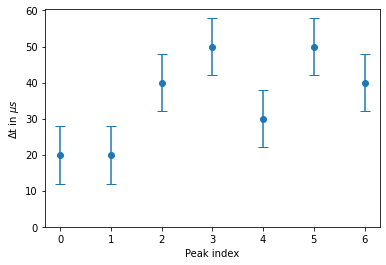

In [43]:
pp = np.array(peak_pos)[4:12]
x = range(len(pp)-1)
y = []
for i in x:
    y.append((pp[i+1] - pp[i])*	5)
plt.errorbar(x,y, yerr=[8]*(len(pp)-1),fmt='o', capsize=5)
plt.ylabel('$\Delta$t in $\mu s$')
plt.xlabel('Peak index')
plt.ylim(0)
plt.savefig("ndYAK-Laser/output/spk25-peak-abstand.svg")
pp*	5e-3

## 2. lifetime

In [44]:
lt = pd.read_csv("ndYAK-Laser/data/lifetime/lifetime-mit-verstärker.csv",skiprows=1)
re_spannung=simple_norm(lt['Volt'])
lt_intensitaet=simple_norm(lt['Volt.1'])

###  ermittlung der messintervaldauer

120    4.80
121    4.80
122   -2.76
123   -2.76
124   -2.76
       ... 
787   -2.82
788   -2.82
789   -2.82
790    4.80
791    4.80
Name: Volt, Length: 672, dtype: float64

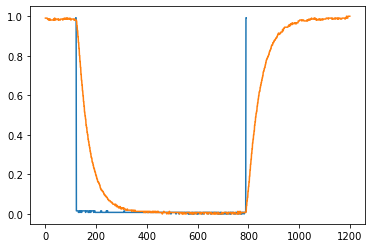

In [45]:
c,d = 120,792
plt.plot(lt['Sequence'][c:d],re_spannung[c:d])
plt.plot(lt['Sequence'],lt_intensitaet)
lt['Volt'][c:d]

In [46]:
offlength = 790 - 120
timeinterval = 1 / (150* 2* offlength)
timeinterval

4.975124378109453e-06

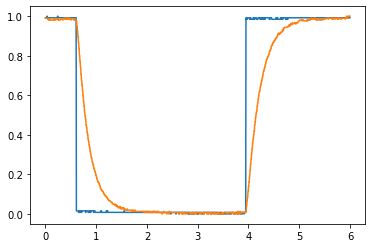

In [47]:
timeinterval = 5e-6
plt.plot(lt['Sequence']*timeinterval*1e3,re_spannung)
plt.plot(lt['Sequence']*timeinterval*1e3,lt_intensitaet)

### Auswahl des abfallenden intervals

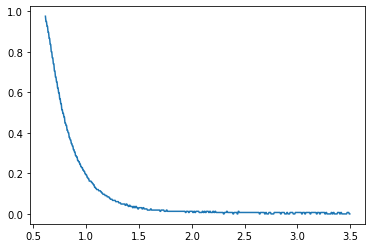

In [48]:
a,b = 123, 700
plt.plot(lt['Sequence'][a:b]*timeinterval*1e3,lt_intensitaet[a:b])

### eigentlicher fit

/opt/conda/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[0.23829219 1.        ] [inf inf]
T=238.29218885793182+/-inf us 	 a=1.0+/-inf


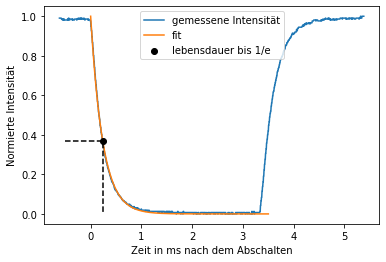

In [49]:
x,y = (lt['Sequence'][a:b]-a)*timeinterval*1e3,lt_intensitaet[a:b]
plt.plot((lt['Sequence']-a)*timeinterval*1e3,lt_intensitaet,label="gemessene Intensität")
def fit(x,T,a):
    return np.exp(-x/T)

c, cov = curve_fit(fit,x,y)
perr = np.sqrt(np.diag(cov))
T = c[0]
uT =perr[0]
print(c,perr)
print(f"T={un.ufloat(c[0],perr[0])*1e3} us \t a={un.ufloat(c[1],perr[1])}")

x1 = np.linspace(0,700,500)*timeinterval*1e3
y1 = fit(x1, c[0],c[1])
plt.plot(x1,y1,label="fit")
plt.scatter(c[0],1/math.e,c="k",zorder=5,label="lebensdauer bis 1/e")
plt.plot([-.5,T,T],[1/math.e,1/math.e,0],c="k", ls='--')
plt.xlabel('Zeit in ms nach dem Abschalten')
plt.ylabel('Normierte Intensität')
plt.legend()
plt.savefig("ndYAK-Laser/output/lifetime.svg")

## 5. laserschwelle - Quantenausbeute

In [50]:
leistung = pd.read_csv("ndYAK-Laser/data/ausgangsleistung.tsv",sep='\t',decimal=",")
leistung

,pumplaser mA,uI,T in celsius,uT,laser mW,uI.1
0,300,2,26.7,0.25,0.8,0.5
1,325,2,26.4,0.25,1.2,0.5
2,350,2,25.8,0.25,1.7,0.5
3,375,2,25.0,0.25,2.5,0.5
4,400,2,24.6,0.20,3.6,0.5
5,425,2,24.2,0.15,4.5,0.5
6,450,2,23.9,0.10,5.4,0.5
7,475,2,23.3,0.10,6.4,0.5
8,500,2,23.0,0.10,7.6,0.5


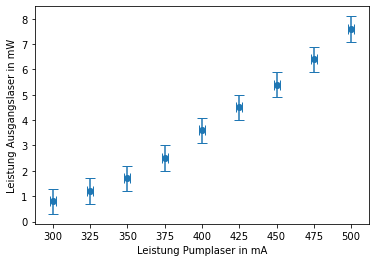

In [51]:
plt.errorbar(leistung['pumplaser mA'],leistung['laser mW'],xerr=leistung['uI'],yerr=leistung['uI.1'],fmt='o', capsize=5)
plt.xlabel('Leistung Pumplaser in mA')
plt.ylabel('Leistung Ausgangslaser in mW')
plt.savefig("ndYAK-Laser/output/Laserausgangsleistung-pumpstromstaerke.svg")

[ 0.03977143 -6.43428572] [0.00094933 0.27592516]
Pmin=162+/-8mW m=3.98+/-0.09% c=-6.43+/-0.28mW


161.78160929192842+/-7.940097424763597

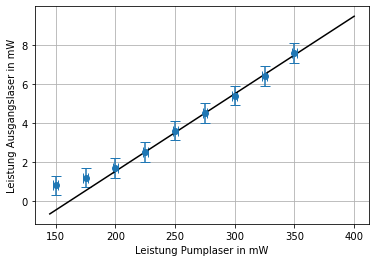

In [78]:
# m = 1 mW/mA bei 400 bis 500mA
# aber 0 mW bei ca. 150 mA
x,y = leistung['pumplaser mA']-150,leistung['laser mW']
plt.errorbar(x,y,xerr=leistung['uI'],yerr=leistung['uI.1'],fmt='o', capsize=5)

def lin_fit(x,m,c):
    return m*x + c

c, cov = curve_fit(lin_fit,x[3:],y[3:])
perr = np.sqrt(np.diag(cov))
print(c,perr)

x1 = np.linspace(145,400,500)
y1 = lin_fit(x1, c[0], c[1])
plt.plot(x1,y1,c='k')


Pmin = - un.ufloat(c[1],perr[1]) / un.ufloat(c[0],perr[0])
B =  un.ufloat(c[1],perr[1])
m = un.ufloat(c[0],perr[0])
# uPmin =
print(f"Pmin={Pmin}mW m={m*100}% c={B}mW")
# plt.legend()
plt.xlabel('Leistung Pumplaser in mW')
plt.ylabel('Leistung Ausgangslaser in mW')
plt.grid()
plt.savefig("ndYAK-Laser/output/Laserausgangsleistung-pumpleistung.svg")
Pmin

In [76]:
eta0 = m * (1064/808)
print(f"eta_0={eta0*100}%")

eta_0=5.24+/-0.13%


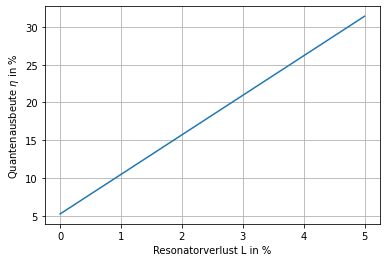

In [81]:
T = 0.01
x = np.linspace(0,0.05,500)
y = m.n * (1064/808) * (T+x)/T
plt.plot(x*100,y*100)
plt.grid()
plt.xlabel("Resonatorverlust L in %")
plt.ylabel("Quantenausbeute $\eta$ in %")
plt.savefig("ndYAK-Laser/output/quantenausbeute.svg")